In [77]:
import cv2
import matplotlib.image as img
import matplotlib.pyplot as plt
from random import randint
import PIL
import os
import numpy as np
from copy import deepcopy
from skimage import exposure



class Chromosome:
    
    def __init__(self,x,y,a,b,fitness, black):
        self.x = x
        self.y = y
        self.a = a
        self.b = b
        self.fitness = fitness
        self.black = black
        
    def __lt__(self,other):
        return self.fitness < other.fitness

def generate_chromosomes(canny):
    population = []
    for i in range(1000):
        x = randint(0,319)
        y = randint(0,241)
        a = randint(0,319)
        b = randint(0,241)
        chrom = Chromosome(x,y,a,b,0, 0)
        chrom = calculate_fitness(chrom,canny)
        population.append(chrom)
        
    return population

def calculate_pixel_difference(x,y,a,b,canny):
    count = 0
    black = 0
    for i in range(y,y+b+1):
        for j in range(x,x+a+1):
            if canny[i][j] == 0:
                black += 1
            else:
                count = count + 1
    return [count, black]
    

def calculate_fitness(chromosome,canny):
    x = chromosome.x
    y = chromosome.y
    a = chromosome.a
    b = chromosome.b
    if a!=0 and b!=0 and 1<= a/b <= 2 and y+b<127 and x+a<127:
        val = calculate_pixel_difference(x,y,a,b,canny)
        chromosome.fitness = val[0]
        chromosome.black = val[1]
    return chromosome

def crossover(population,canny):
    
    new_chromosome = None
    while True:
        a = randint(0,99)
        b = randint(0,99)
        if a != b:
            break
    
    chromosome1 = population[a]
    chromosome2 = population[b]
    
    crossover_point = randint(0,2)
    if crossover_point == 0:    
        new_chromosome = Chromosome(chromosome1.x,chromosome2.y,chromosome2.a,chromosome2.b,0, 0)
        new_chromosome = calculate_fitness(new_chromosome,canny)
        population.append(new_chromosome)
        
        new_chromosome = Chromosome(chromosome2.x,chromosome1.y,chromosome1.a,chromosome1.b,0, 0)
        new_chromosome = calculate_fitness(new_chromosome,canny)
        population.append(new_chromosome)
        
    
    elif crossover_point == 1:
        new_chromosome = Chromosome(chromosome1.x,chromosome1.y,chromosome2.a,chromosome2.b,0, 0)
        new_chromosome = calculate_fitness(new_chromosome,canny)
        population.append(new_chromosome)
        
        new_chromosome = Chromosome(chromosome2.x,chromosome2.y,chromosome1.a,chromosome1.b,0, 0)
        new_chromosome = calculate_fitness(new_chromosome,canny)
        population.append(new_chromosome)
        
        
    elif crossover_point == 2:
        new_chromosome = Chromosome(chromosome1.x,chromosome1.y,chromosome1.a,chromosome2.b,0, 0)
        new_chromosome = calculate_fitness(new_chromosome,canny)
        population.append(new_chromosome)
        
        new_chromosome = Chromosome(chromosome2.x,chromosome2.y,chromosome2.a,chromosome1.b,0, 0)
        new_chromosome = calculate_fitness(new_chromosome,canny)
        population.append(new_chromosome)
        
    
    return population

        
def two_point_crossover(population,canny):
    
    while True:
        a = randint(0,99)
        b = randint(0,99)
        if a != b:
            break
    
    chromosome1 = population[a]
    chromosome2 = population[b]
    
    new_chromosome = None
    
    c = randint(0,3)
    d = randint(0,3)
    while c == d:
        d = randint(0,3)
    
    if c == 0 and d == 1:
        new_chromosome = Chromosome(chromosome1.x,chromosome2.y,chromosome1.a,chromosome1.b,0, 0)
        new_chromosome = calculate_fitness(new_chromosome,canny)
        population.append(new_chromosome)
        
        new_chromosome = Chromosome(chromosome2.x,chromosome1.y,chromosome2.a,chromosome2.b,0, 0)
        new_chromosome = calculate_fitness(new_chromosome,canny)
        population.append(new_chromosome)
    
    elif c == 1 and d == 2:
        new_chromosome = Chromosome(chromosome1.x,chromosome1.y,chromosome2.a,chromosome1.b,0, 0)
        new_chromosome = calculate_fitness(new_chromosome,canny)
        population.append(new_chromosome)
        
        new_chromosome = Chromosome(chromosome2.x,chromosome2.y,chromosome1.a,chromosome2.b,0, 0)
        new_chromosome = calculate_fitness(new_chromosome,canny)
        population.append(new_chromosome)
    
    elif c == 0 and d == 2:
        new_chromosome = Chromosome(chromosome1.x,chromosome2.y,chromosome2.a,chromosome1.b,0, 0)
        new_chromosome = calculate_fitness(new_chromosome,canny)
        population.append(new_chromosome)
        
        new_chromosome = Chromosome(chromosome2.x,chromosome1.y,chromosome1.a,chromosome2.b,0, 0)
        new_chromosome = calculate_fitness(new_chromosome,canny)
        population.append(new_chromosome)
    
    return population
    

def mutation(population,canny):
    new_chromosome = None
    a = randint(0,99)
    chromosome1 = population[a]
    d = randint(0,3)
    if d == 0:
        x = randint(0,319)
        new_chromosome = Chromosome(x,chromosome1.y,chromosome1.a,chromosome1.b,0, 0)
        new_chromosome = calculate_fitness(new_chromosome,canny)
        
    elif d == 1:
        y = randint(0,241)
        new_chromosome = Chromosome(chromosome1.x,y,chromosome1.a,chromosome1.b,0, 0)
        new_chromosome = calculate_fitness(new_chromosome,canny)
        
    elif d == 2:
        a = randint(0,319)
        new_chromosome = Chromosome(chromosome1.x,chromosome1.y,a,chromosome1.b,0, 0)
        new_chromosome = calculate_fitness(new_chromosome,canny)
        
    elif d == 3:
        b = randint(0,241)
        new_chromosome = Chromosome(chromosome1.x,chromosome1.y,chromosome1.a,b,0, 0)
        new_chromosome = calculate_fitness(new_chromosome,canny)
    
    population.append(new_chromosome)
    
    return population
        
    
    
    
        

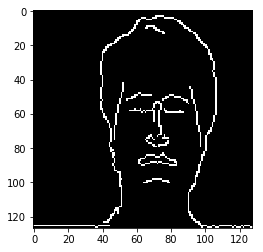

In [78]:
# path = "Dataset\\yalefaces\\"
# yale = os.listdir(path)
# for im in yale:
    #Dataset\\yalefaces\\subject01.normal
#     print(im)
image = img.imread("Dataset\\yalefaces\\subject01.normal")
img = cv2.resize(image,(128,128))
canny = cv2.Canny(img,250,500)
canny = canny[1:]
plt.imshow(canny,cmap='gray')


In [79]:
population = generate_chromosomes(canny)
population = sorted(population,reverse=True)

In [80]:
for i in range(15):
    population = population[:100]
    print(population[0].fitness, population[0].black)
    temp_population = deepcopy(population)
    
    for j in range(200):
        temp_population = crossover(population,canny)
    
    for j in range(200):
        temp_population = two_point_crossover(population,canny)
    
    for j in range(100):
        temp = mutation(population,canny)
        
    population = temp
    population = sorted(population,reverse = True)

        

259 4358
259 4358
386 5965
386 5965
468 8940
472 8936
472 8936
472 8936
475 6833
487 6821
489 6819
494 6988
540 8920
540 8920
540 8920


In [81]:
# NewPop = []
# count = 0
# print("Len(population): ", len(population))
# for i in range(len(population)):
#     for j in range(1, len(population)):
#         if i != j and population[i].fitness != population[j].fitness:
#             flag1 = True
#             flag2 = True
#             for k in range(len(NewPop)):
#                 if NewPop[k].fitness == population[i].fitness:
#                     flag1 = False
#                 if NewPop[k].fitness == population[j].fitness:
#                     flag2 = False
                    
#             if flag1:
#                 NewPop.append(population[i])
#                 print(population[i].fitness)
#             if flag2:
#                 NewPop.append(population[j])
#                 print(population[j].fitness)
    
# print("Len(NewPop): ", len(NewPop))
# bw = 16500
# index = -1;
# for i in range(len(NewPop)):
#     val = NewPop[i].black-NewPop[i].fitness
#     if val < bw:
#         bw = val
#         index = i
# print(index)

540 11 41 109 85


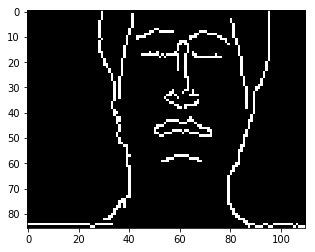

In [82]:
index = 0
print(population[index].fitness,population[index].x,population[index].y,population[index].a,population[index].b)
x=population[index].x
y=population[index].y
a=population[index].a
b=population[index].b
temp = canny[y:y+b+1,x:x+a+1]
plt.imshow(temp,cmap='gray')
# print(temp)

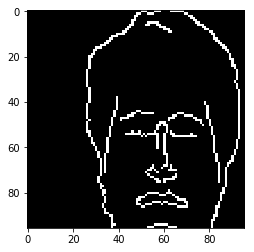

In [35]:
# x=population[index].x
# y=population[index].y
# a=population[index].a
# b=population[index].b
# temp = canny[y:y+b+1,x:x+a+1]
# plt.imshow(temp,cmap='gray')

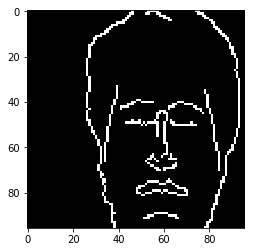

In [37]:
# x=population[100].x
# y=population[100].y
# a=population[100].a
# b=population[100].b
# temp = canny[y:y+b+1,x:x+a+1]
# plt.imshow(temp,cmap='gray')

In [39]:
# for i in range(len(population)):
#     print(population[i].fitness)

549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
549
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
540
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
538
